In [1]:
import tensorflow as tf

In [2]:
!ls ./data

2016.04C.multisnr         2016.04C.multisnr.tar.bz2
2016.04C.multisnr.pkl     RML2016.10a.tar.bz2


In [3]:
!ls ./data

2016.04C.multisnr         2016.04C.multisnr.tar.bz2
2016.04C.multisnr.pkl     RML2016.10a.tar.bz2


In [5]:
import keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
import pickle
import gzip
import numpy

In [9]:
with open('data/2016.04C.multisnr.pkl','rb') as f:
    p = pickle.load(f)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd2 in position 2: ordinal not in range(128)

In [10]:
with open('data/2016.04C.multisnr.pkl','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = ' utf-8'
    p = u.load()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 2: invalid continuation byte

In [12]:
with open('data/2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [13]:
import numpy as np


In [14]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])

each has two vectors. each vector length 128 (0-127)

time series

each sample representing time series representation of signals that generated.

generate rule :

- different modulation method
- different snrs

suspection about two vector representing data :

- quadrature
- inphase


https://www.wikiwand.com/en/In-phase_and_quadrature_components

sin(x + φ)=sin(x) cos(φ) + sin(x + π/2) sin(φ).

cos(x + φ) = cos(x) cos(φ) + cos(x + π/2) sin(φ),

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/86b425dbd25ac2dd769ee09fedcf69b279fb8ff8)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b3ae1aed092095e106c9fa374833b877c21bae37)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/In-phase_and_quadrature_components_of_angle_modulation.gif/800px-In-phase_and_quadrature_components_of_angle_modulation.gif)

In [15]:
snrs


[-20,
 -18,
 -16,
 -14,
 -12,
 -10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18]

In [17]:
len(snrs)

20

In [18]:
len(p)

220

In [28]:
p_items =list(p.items())

In [31]:
p_items[0][1]

array([[[ 0.4109198 ,  0.56773436, -0.04640523, ..., -0.1798929 ,
          0.716478  ,  0.5650488 ],
        [ 0.61052245,  0.07968219,  0.71196485, ...,  0.5997812 ,
         -0.7751243 ,  0.07947703]],

       [[-0.3283514 ,  0.26672688,  0.5008272 , ..., -0.54886734,
          0.6240628 , -0.19677497],
        [ 1.1222538 , -0.50120413,  0.335419  , ..., -0.17551056,
          0.601274  , -0.76099205]],

       [[ 0.7291241 ,  0.2782261 , -0.15890744, ...,  0.05849003,
          0.03547996,  0.31850484],
        [-0.23750067,  0.55178803,  0.38840112, ..., -0.10801675,
          0.9001341 , -0.00817928]],

       ...,

       [[ 0.5222992 , -0.29372013, -0.7762444 , ...,  0.07442222,
          0.05554938,  0.17324428],
        [ 1.6257662 ,  0.18046701,  0.39357424, ...,  2.2899702 ,
          2.0726585 ,  1.4300334 ]],

       [[-3.4681609 , -2.5083191 , -2.4340682 , ..., -0.38470355,
         -0.55542845,  0.23871157],
        [-0.8451822 , -0.3398318 ,  0.9476198 , ...,  1.92670

In [32]:
len(p_items[0][1])

622

In [33]:
X = []

In [34]:
labels = []

In [41]:
print(mods)

print(snrs)

p[(mods[0],snrs[0])]

p[(mods[0],snrs[0])].shape


['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


(413, 2, 128)

In [42]:
p[(mods[0],snrs[0])].shape[0]

413

In [45]:
p[(mods[0],snrs[0])]


array([[[  24.714563  ,  -29.568644  ,   92.68012   , ...,
           47.776936  ,  -18.414425  ,    2.6127734 ],
        [ -48.443947  ,    7.4777226 ,  -31.440838  , ...,
          -35.22897   ,  -18.624535  ,   55.108932  ]],

       [[  -7.4243298 ,  119.80825   , -111.365616  , ...,
          -31.315722  , -113.13201   ,   40.65939   ],
        [ 167.00078   ,  -21.273016  ,   38.65764   , ...,
         -115.24621   ,  -80.3968    ,   48.018898  ]],

       [[ 140.26158   ,  -55.305504  ,   91.71414   , ...,
            8.354092  ,  -52.09348   ,  -59.840755  ],
        [  12.849184  ,   23.583422  ,   -3.1462991 , ...,
           73.667694  ,   64.10245   ,   36.153652  ]],

       ...,

       [[ -30.15955   ,   -1.5014894 ,   33.530727  , ...,
           24.784103  ,   17.174084  ,  -10.490381  ],
        [  -4.6549067 ,   17.495388  ,   19.235735  , ...,
            0.44725794,   44.62569   ,  -55.154842  ]],

       [[  60.957474  ,   73.41103   ,  -96.959305  , ...,
        

In [46]:
p[(mods[0],snrs[0])].shape[1]


2

In [47]:
p[(mods[0],snrs[0])].shape[2]

128

In [48]:
p[(mods[0],snrs[0])][0]


array([[  24.714563  ,  -29.568644  ,   92.68012   ,   -0.6211241 ,
          33.062744  ,   -6.2919946 ,   -5.9258704 , -131.96852   ,
         -69.56522   ,   44.74652   ,  -89.15495   , -101.97785   ,
         -18.323557  ,  -30.385767  ,    1.9968935 ,  -61.500935  ,
          37.332264  ,  -28.064968  ,   59.465668  ,  -46.179398  ,
         -26.009663  ,  -52.362324  ,   61.56313   ,   65.796425  ,
          65.44162   ,   30.869577  ,   43.397816  ,   73.950745  ,
         -33.643257  ,   -0.21010807,   96.22332   ,   15.490614  ,
          41.540924  ,   16.351875  ,  -22.676212  ,   68.52634   ,
         -31.446701  ,  -41.51053   ,   47.405647  ,   55.173832  ,
          33.460255  ,  -33.191044  ,  -20.125128  ,  104.928314  ,
          26.355001  ,  -81.8093    ,   44.091236  , -119.93215   ,
         -24.723804  ,   24.986504  ,  -50.097115  ,  128.2814    ,
           9.491681  ,  -94.38004   ,   15.686162  ,   -6.078274  ,
         -73.28054   ,    1.6340322 , -129.16805

In [50]:
# I
p[(mods[0],snrs[0])][0][0]

array([  24.714563  ,  -29.568644  ,   92.68012   ,   -0.6211241 ,
         33.062744  ,   -6.2919946 ,   -5.9258704 , -131.96852   ,
        -69.56522   ,   44.74652   ,  -89.15495   , -101.97785   ,
        -18.323557  ,  -30.385767  ,    1.9968935 ,  -61.500935  ,
         37.332264  ,  -28.064968  ,   59.465668  ,  -46.179398  ,
        -26.009663  ,  -52.362324  ,   61.56313   ,   65.796425  ,
         65.44162   ,   30.869577  ,   43.397816  ,   73.950745  ,
        -33.643257  ,   -0.21010807,   96.22332   ,   15.490614  ,
         41.540924  ,   16.351875  ,  -22.676212  ,   68.52634   ,
        -31.446701  ,  -41.51053   ,   47.405647  ,   55.173832  ,
         33.460255  ,  -33.191044  ,  -20.125128  ,  104.928314  ,
         26.355001  ,  -81.8093    ,   44.091236  , -119.93215   ,
        -24.723804  ,   24.986504  ,  -50.097115  ,  128.2814    ,
          9.491681  ,  -94.38004   ,   15.686162  ,   -6.078274  ,
        -73.28054   ,    1.6340322 , -129.16805   ,   23.97472

In [51]:
# Q
p[(mods[0],snrs[0])][0][0]


array([  24.714563  ,  -29.568644  ,   92.68012   ,   -0.6211241 ,
         33.062744  ,   -6.2919946 ,   -5.9258704 , -131.96852   ,
        -69.56522   ,   44.74652   ,  -89.15495   , -101.97785   ,
        -18.323557  ,  -30.385767  ,    1.9968935 ,  -61.500935  ,
         37.332264  ,  -28.064968  ,   59.465668  ,  -46.179398  ,
        -26.009663  ,  -52.362324  ,   61.56313   ,   65.796425  ,
         65.44162   ,   30.869577  ,   43.397816  ,   73.950745  ,
        -33.643257  ,   -0.21010807,   96.22332   ,   15.490614  ,
         41.540924  ,   16.351875  ,  -22.676212  ,   68.52634   ,
        -31.446701  ,  -41.51053   ,   47.405647  ,   55.173832  ,
         33.460255  ,  -33.191044  ,  -20.125128  ,  104.928314  ,
         26.355001  ,  -81.8093    ,   44.091236  , -119.93215   ,
        -24.723804  ,   24.986504  ,  -50.097115  ,  128.2814    ,
          9.491681  ,  -94.38004   ,   15.686162  ,   -6.078274  ,
        -73.28054   ,    1.6340322 , -129.16805   ,   23.97472

In [52]:
# Signal
p[(mods[0],snrs[0])][0]

array([[  24.714563  ,  -29.568644  ,   92.68012   ,   -0.6211241 ,
          33.062744  ,   -6.2919946 ,   -5.9258704 , -131.96852   ,
         -69.56522   ,   44.74652   ,  -89.15495   , -101.97785   ,
         -18.323557  ,  -30.385767  ,    1.9968935 ,  -61.500935  ,
          37.332264  ,  -28.064968  ,   59.465668  ,  -46.179398  ,
         -26.009663  ,  -52.362324  ,   61.56313   ,   65.796425  ,
          65.44162   ,   30.869577  ,   43.397816  ,   73.950745  ,
         -33.643257  ,   -0.21010807,   96.22332   ,   15.490614  ,
          41.540924  ,   16.351875  ,  -22.676212  ,   68.52634   ,
         -31.446701  ,  -41.51053   ,   47.405647  ,   55.173832  ,
          33.460255  ,  -33.191044  ,  -20.125128  ,  104.928314  ,
          26.355001  ,  -81.8093    ,   44.091236  , -119.93215   ,
         -24.723804  ,   24.986504  ,  -50.097115  ,  128.2814    ,
           9.491681  ,  -94.38004   ,   15.686162  ,   -6.078274  ,
         -73.28054   ,    1.6340322 , -129.16805

In [54]:
p[(mods[0],snrs[0])].shape

(413, 2, 128)

In [55]:
p[(mods[0],snrs[0])][1][0]
p[(mods[0],snrs[0])][1][1]

array([ 167.00078   ,  -21.273016  ,   38.65764   ,   -6.8282866 ,
        -57.695274  ,   68.86412   ,  107.330345  ,   47.552097  ,
         29.709524  ,  -39.23092   ,   12.462088  ,   -9.949671  ,
          7.4783106 ,   18.972824  ,  -12.808772  ,   67.633316  ,
        -29.103151  ,  -20.070566  ,  -51.97744   ,  141.00816   ,
         41.259205  ,   -0.53856903,    6.6250005 ,  -43.925224  ,
         31.103895  ,   53.926334  ,  -49.36656   ,  -20.647512  ,
         60.535015  ,   38.67477   ,   20.489979  ,   66.109116  ,
         -6.660988  , -143.35045   ,   92.50412   ,   12.260289  ,
         15.894047  ,  -33.721985  ,    4.958162  ,  -77.55236   ,
        -28.78356   ,   17.448458  , -156.99731   ,   46.477085  ,
         75.3186    ,    5.517721  ,  -28.463383  ,   23.985146  ,
         13.697032  ,   32.07361   ,  -84.96232   ,  -27.923908  ,
          7.316182  ,  121.537544  , -109.41055   ,  -28.545713  ,
        196.12985   ,  -19.010529  ,  -24.389406  ,   -6.26357

In [56]:
p[(mods[0],snrs[0])][2][0]
p[(mods[0],snrs[0])][2][1]

array([ 1.28491840e+01,  2.35834217e+01, -3.14629912e+00,  4.97426605e+01,
        7.56954422e+01,  3.49125595e+01,  1.30485096e+01,  2.17966938e+01,
       -6.08531570e+01, -1.08951674e+01, -1.10862366e+02, -5.55311890e+01,
        7.43123016e+01, -4.91474915e+00, -1.34763382e+02,  6.86228638e+01,
       -3.53856239e+01,  8.88509064e+01,  7.22510834e+01, -1.14920105e+02,
       -3.61340828e+01,  8.32604523e+01, -1.31372879e+02, -1.41692142e+01,
        6.37553406e+01, -4.14390717e+01,  4.21165466e+01, -5.24825668e+01,
        1.41727051e+02, -8.98787384e+01,  5.06271820e+01, -2.79745522e+01,
        4.07579193e+01,  1.38089127e+02, -3.79473877e+01, -1.57240331e+00,
        1.97169357e+02,  2.08990550e+00,  4.18096313e+01,  7.21353073e+01,
       -1.21528549e+02, -7.14036331e+01,  3.71882105e+00,  3.67365799e+01,
       -1.49267960e+02, -3.48946357e+00,  4.68388901e+01, -1.31159420e+01,
        5.85256577e+00, -1.34463409e+02, -1.32811909e+01, -8.06031494e+01,
        2.96168957e+01, -

In [57]:
len(p)

220

In [58]:
len(mods)


11

In [59]:
len(snrs)


20

In [63]:
samp = []
for i in range(len(p)):
    for j in range(len(snrs)):
        for k in range(len(mods)):
            samp.append(((i,j),k))

for each of 11 mods, give each of 20 snrs and get 1 signal S

each signal has length 128 (0-127)

each signal represented by two vectors (I,Q)

In [64]:
# Get X and labels
X =[]


In [65]:
labels = []

In [67]:
for mod in mods:
    for snr in snrs:
        X.append(p[(mod,snr)])
        for i in range(p[(mod,snr)].shape[0]):  labels.append((mod,snr))

In [68]:
len(labels)


252920

In [69]:
len(X)

440

In [71]:
X = np.vstack(X)
# Stack arrays in sequence vertically (row wise).


In [72]:
print(X.shape)


(648240, 128)


In [73]:
print(X[1])



[ -48.443947      7.4777226   -31.440838    -40.560493     24.054295
   -9.070399    -48.772076    -27.676313    -61.310028    -63.247566
 -148.70433      13.165405     34.273678     -6.2054586   -96.844154
   18.646963     72.605156    -48.348125    -20.737955     52.368286
  -26.938463    -47.6437       36.02798     -18.76986      55.265747
  -48.154728    -40.963207    135.54747      64.1786       22.936222
  -39.407227    -65.35381     -48.84236      46.94179      -2.4959514
   57.187664      3.183203     30.822474    -37.40958       5.9612103
   17.967447   -105.26102      58.44352       6.9919004    76.98362
  -69.86508      13.511899    -45.171337      9.744004     45.80157
  -37.418198     22.58135     -17.159422    -37.745296    -16.780392
  -59.678986     73.07839     -69.61202     -74.85885     -22.856764
   84.3326      -62.72953     130.91032     -15.665724    167.00078
  -21.273016     38.65764      -6.8282866   -57.695274     68.86412
  107.330345     47.552097     29.70

![](https://i0.wp.com/www.sharpsightlabs.com/wp-content/uploads/2019/07/numpy-vstack-combine-two-python-lists.png?w=476&ssl=1)

In [75]:
print(p.keys())

dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), ('BPSK

In [76]:
print(p["QPSK",2].shape)


(622, 2, 128)


In [77]:
print(X.shape)

(648240, 128)


In [78]:
shapes=[]

In [79]:
snrs=[]

In [80]:
mod_types=[]

In [81]:
for x in p.keys():
  shapes.append(p[x].shape)
  snrs.append(x[1])
  mod_types.append(x[0])


In [82]:
print("same distribution of number of samples as shown:")
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])


same distribution of number of samples as shown:
[(206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128)]
[(310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128)]
[(413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128)]


In [83]:
print("same modulation type but different SNRs:")
print(p["QPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)

same modulation type but different SNRs:
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)


In [84]:
print("Again : same modulation type but different SNRs:")
print(p["CPFSK",-20].shape)
print(p["CPFSK",-18].shape)
print(p["CPFSK",-16].shape)
print(p["CPFSK",-14].shape)
print(p["CPFSK",-12].shape)
print(p["CPFSK",-10].shape)
print(p["CPFSK",-8].shape)
print(p["CPFSK",-6].shape)
print(p["CPFSK",-4].shape)
print(p["CPFSK",-2].shape)
print(p["CPFSK",0].shape)
print(p["CPFSK",2].shape)
print(p["CPFSK",4].shape)
print(p["CPFSK",6].shape)
print(p["CPFSK",8].shape)
print(p["CPFSK",10].shape)
print(p["CPFSK",12].shape)
print(p["CPFSK",14].shape)
print(p["CPFSK",16].shape)
print(p["CPFSK",18].shape)

Again : same modulation type but different SNRs:
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)
(1247, 2, 128)


In [85]:

print("same SNR for Different modulation types:")
print(p["QPSK",2].shape)
print(p["PAM4",2].shape)
print(p["AM-DSB",2].shape)
print(p["QAM64",2].shape)
print(p["AM-SSB",2].shape)
print(p["QAM16",2].shape)
print(p["8PSK",2].shape)
print("values in keys:")
print(sorted(set(snrs)))
print(len(set(snrs)))
print(set(mod_types))
print(len(set(mod_types)))
print("all different shapes:")
print(sorted(set(shapes)))

same SNR for Different modulation types:
(622, 2, 128)
(622, 2, 128)
(705, 2, 128)
(206, 2, 128)
(705, 2, 128)
(310, 2, 128)
(413, 2, 128)
values in keys:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
20
{'GFSK', 'QAM64', 'BPSK', 'QAM16', 'PAM4', 'AM-SSB', 'CPFSK', '8PSK', 'AM-DSB', 'WBFM', 'QPSK'}
11
all different shapes:
[(206, 2, 128), (310, 2, 128), (413, 2, 128), (622, 2, 128), (705, 2, 128), (779, 2, 128), (1247, 2, 128)]


Dataset has 11 modulation types and 20 SNR values forming 220 different keys each key has different number of samples

each Modulation type (ex : QPSK,8PSK ...etc) has same number of samples for different SNRs

the 128 dimentions represent values at each micro second of 128 micro seconds so these are samples in time

difference between dimentions and divided by change in time which is 1

In [98]:
import numpy as np
X_npArray=np.array(X)
print("before differentiation (2nd sample):")
print(X_npArray[0])
print("After diffrentiation : (you can see 1st element of any channel is diffrence between 1st and second of array before)")
X_driv=np.diff(X_npArray)
print(X_driv[0])
z=np.zeros((162060,2,1))
print("shape before:")
print(X_driv.shape)
X_driv=np.concatenate((z, X_driv), axis=2)
print("shape after:")
print(X_driv.shape)
print("element with added zeros :")
print(X_driv[0])
print(X[0])

before differentiation (2nd sample):
[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
   -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
  -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
  -61.500935     37.332264    -28.064968     59.465668    -46.179398
  -26.009663    -52.362324     61.56313      65.796425     65.44162
   30.869577     43.397816     73.950745    -33.643257     -0.21010807
   96.22332      15.490614     41.540924     16.351875    -22.676212
   68.52634     -31.446701    -41.51053      47.405647     55.173832
   33.460255    -33.191044    -20.125128    104.928314     26.355001
  -81.8093       44.091236   -119.93215     -24.723804     24.986504
  -50.097115    128.2814        9.491681    -94.38004      15.686162
   -6.078274    -73.28054       1.6340322  -129.16805      23.974726
   35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
  119.80825    -111.365616    -27.864609     49.59459     -92.43

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

before differentiation (2nd sample):


before differentiation (2nd sample):


[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
   -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
  -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
  -61.500935     37.332264    -28.064968     59.465668    -46.179398
  -26.009663    -52.362324     61.56313      65.796425     65.44162
   30.869577     43.397816     73.950745    -33.643257     -0.21010807
   96.22332      15.490614     41.540924     16.351875    -22.676212
   68.52634     -31.446701    -41.51053      47.405647     55.173832
   33.460255    -33.191044    -20.125128    104.928314     26.355001
  -81.8093       44.091236   -119.93215     -24.723804     24.986504
  -50.097115    128.2814        9.491681    -94.38004      15.686162
   -6.078274    -73.28054       1.6340322  -129.16805      23.974726
   35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
  119.80825    -111.365616    -27.864609     49.59459     -92.436195
  -14.834814    -65.57745      9

[ -54.283207    122.248764    -93.30125      33.68387     -39.35474
    0.36612415 -126.04265      62.403297    114.311745   -133.90147
  -12.822899     83.6543      -12.06221      32.38266     -63.49783
   98.8332      -65.39723      87.53064    -105.645065     20.169735
  -26.352661    113.92545       4.2332954    -0.354805    -34.572044
   12.528238     30.552929   -107.594        33.433147     96.433426
  -80.732704     26.05031     -25.189049    -39.028088     91.202545
  -99.97304     -10.0638275    88.916176      7.7681847   -21.713577
  -66.6513       13.065916    125.053444    -78.57331    -108.16431
  125.90054    -164.02339      95.20834      49.710308    -75.08362
  178.37851    -118.78972    -103.87173     110.06621     -21.764435
  -67.20227      74.91457    -130.80208     153.14278      11.476221
  -75.39334     -29.540752     43.063576     18.995243    127.23258
 -231.17386      83.50101      77.4592     -142.03079      77.60138
  -50.742638    164.88623    -239.51254  

In [96]:
z=np.zeros((162060,2,1))


In [97]:
print(X_driv.shape)

(648240, 127)


In [95]:
X_driv=np.concatenate((z, X_driv), axis=2)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt

In [100]:
np.random.seed(0)



In [101]:
dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)


In [102]:
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [103]:
len(t)


1000

In [104]:
nse = np.random.randn(len(t))

In [105]:
r = np.exp(-t / 0.05)

In [106]:
r

array([1.00000000e+00, 8.18730753e-01, 6.70320046e-01, 5.48811636e-01,
       4.49328964e-01, 3.67879441e-01, 3.01194212e-01, 2.46596964e-01,
       2.01896518e-01, 1.65298888e-01, 1.35335283e-01, 1.10803158e-01,
       9.07179533e-02, 7.42735782e-02, 6.08100626e-02, 4.97870684e-02,
       4.07622040e-02, 3.33732700e-02, 2.73237224e-02, 2.23707719e-02,
       1.83156389e-02, 1.49955768e-02, 1.22773399e-02, 1.00518357e-02,
       8.22974705e-03, 6.73794700e-03, 5.51656442e-03, 4.51658094e-03,
       3.69786372e-03, 3.02755475e-03, 2.47875218e-03, 2.02943064e-03,
       1.66155727e-03, 1.36036804e-03, 1.11377515e-03, 9.11881966e-04,
       7.46585808e-04, 6.11252761e-04, 5.00451433e-04, 4.09734979e-04,
       3.35462628e-04, 2.74653570e-04, 2.24867324e-04, 1.84105794e-04,
       1.50733075e-04, 1.23409804e-04, 1.01039402e-04, 8.27240656e-05,
       6.77287365e-05, 5.54515994e-05, 4.53999298e-05, 3.71703187e-05,
       3.04324830e-05, 2.49160097e-05, 2.03995034e-05, 1.67017008e-05,
      

In [107]:
cnse = np.convolve(nse, r) * dt

In [108]:
cnse

array([ 1.76405235e-02,  1.84444111e-02,  2.48883865e-02, ...,
       -3.11309462e-89, -2.67913870e-89, -6.05318444e-90])

In [109]:
cnse = cnse[:len(t)]

In [110]:
cnse

array([ 1.76405235e-02,  1.84444111e-02,  2.48883865e-02,  4.27858194e-02,
        5.37056460e-02,  3.41976852e-02,  3.74995807e-02,  2.91884879e-02,
        2.28653242e-02,  2.28265291e-02,  2.01292171e-02,  3.10231441e-02,
        3.30099794e-02,  2.82430355e-02,  2.75620740e-02,  2.59026609e-02,
        3.61480958e-02,  2.75439750e-02,  2.56817765e-02,  1.24855028e-02,
       -1.53076331e-02, -5.99664399e-03,  3.73472514e-03, -4.36391588e-03,
        1.91246741e-02,  1.11430209e-03,  1.36989856e-03, -7.50260421e-04,
        1.47135309e-02,  2.67400079e-02,  2.34423411e-02,  2.29745908e-02,
        9.93214651e-03, -1.16762109e-02, -1.30387944e-02, -9.11177229e-03,
        4.84281862e-03,  1.59887630e-02,  9.21722382e-03,  4.52339709e-03,
       -6.78208534e-03, -1.97528812e-02, -3.32349932e-02, -7.70275707e-03,
       -1.14030059e-02, -1.37167346e-02, -2.37582661e-02, -1.16767195e-02,
       -2.56990678e-02, -2.31680200e-02, -2.79230360e-02, -1.89924234e-02,
       -2.06577325e-02, -

In [111]:
s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal


In [112]:
ss = X_npArray

In [113]:
ss

array([[  24.714563  ,  -29.568644  ,   92.68012   , ...,   47.776936  ,
         -18.414425  ,    2.6127734 ],
       [ -48.443947  ,    7.4777226 ,  -31.440838  , ...,  -35.22897   ,
         -18.624535  ,   55.108932  ],
       [  -7.4243298 ,  119.80825   , -111.365616  , ...,  -31.315722  ,
        -113.13201   ,   40.65939   ],
       ...,
       [  -1.7522507 ,   -1.754074  ,   -1.7456273 , ...,   -1.7177453 ,
          -1.7125627 ,   -1.7201289 ],
       [  -0.6809907 ,   -0.7188972 ,   -0.6984149 , ...,   -0.46184787,
          -0.464283  ,   -0.4775168 ],
       [  -1.7290134 ,   -1.7533693 ,   -1.7337438 , ...,   -1.8001451 ,
          -1.7912103 ,   -1.8063469 ]], dtype=float32)

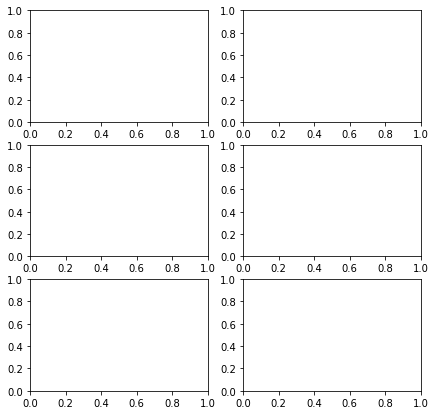

In [114]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

In [115]:
# plot time signal:

In [116]:
axes[0, 0].set_title("Signal")

Text(0.5, 1.0, 'Signal')

In [119]:
val_0= ss[0]


In [127]:
t_s = np.arange(0,128)

In [124]:
val_0

array([  24.714563  ,  -29.568644  ,   92.68012   ,   -0.6211241 ,
         33.062744  ,   -6.2919946 ,   -5.9258704 , -131.96852   ,
        -69.56522   ,   44.74652   ,  -89.15495   , -101.97785   ,
        -18.323557  ,  -30.385767  ,    1.9968935 ,  -61.500935  ,
         37.332264  ,  -28.064968  ,   59.465668  ,  -46.179398  ,
        -26.009663  ,  -52.362324  ,   61.56313   ,   65.796425  ,
         65.44162   ,   30.869577  ,   43.397816  ,   73.950745  ,
        -33.643257  ,   -0.21010807,   96.22332   ,   15.490614  ,
         41.540924  ,   16.351875  ,  -22.676212  ,   68.52634   ,
        -31.446701  ,  -41.51053   ,   47.405647  ,   55.173832  ,
         33.460255  ,  -33.191044  ,  -20.125128  ,  104.928314  ,
         26.355001  ,  -81.8093    ,   44.091236  , -119.93215   ,
        -24.723804  ,   24.986504  ,  -50.097115  ,  128.2814    ,
          9.491681  ,  -94.38004   ,   15.686162  ,   -6.078274  ,
        -73.28054   ,    1.6340322 , -129.16805   ,   23.97472

In [125]:
len(val_0)

128

In [128]:
len(t_s)

128

In [129]:
axes[0, 0].plot(t_s, val_0, color='C0')

In [130]:
axes[0, 0].set_xlabel("Time")


Text(0.5, 271.8023529411765, 'Time')

In [131]:
axes[0, 0].set_ylabel("Amplitude")

Text(3.200000000000003, 0.5, 'Amplitude')

In [132]:
fig.tight_layout()

In [138]:
plt.show()


for other spectrums https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/spectrum_demo.html